MNISTをCNNで解く
================================

## Q1. 実行結果の解釈
「20190410_Q4_01_MNIST_on_CNN」を参照してください。

## Q2. 改良
何らかの改変を施し、よりよいモデルに改良してください。

また、どういう理由で何を改変したのか、その結果どのような変化が起きたかも記述してください。



# 回答

## 採点の基準
- 精度が良くなっているか？
- 正しい方法で精度を評価しているか？
- なぜそのアイデアを採用したかの理由が明快か？
- アイデアを採用する前後の変化を正しく説明できているか？

# 以下、ソースコード

# 結果を可視化するための関数を定義

In [1]:
# 結果を可視化するための関数を定義

import matplotlib.pyplot as plt


def plot_train_val_loss(history):
    """エポックごとの損失の可視化"""
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()


def plot_train_val_acc(history):
    """エポックごとのAccuracyの可視化"""
    train_acc = history.history["acc"]
    val_acc = history.history["val_acc"]

    epochs = range(1, len(train_acc) + 1)

    plt.plot(epochs, train_acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "r", label="Validation acc")

    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.0)
    plt.legend()

    plt.show()

# データの準備

In [2]:
# データのロードと分割

from keras.datasets import mnist
from sklearn.model_selection import train_test_split

(X_trainval, y_trainval), (X_test, y_test) = mnist.load_data()

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=0)

Using TensorFlow backend.


In [3]:
# 学習時間を短くするために訓練データを減らす
X_train = X_train[:1000]
y_train = y_train[:1000]

X_train.shape, y_train.shape

((1000, 28, 28), (1000,))

In [4]:
# 入力データの前処理
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_train = X_train.astype("float32") / 255

X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))
X_val = X_val.astype("float32") / 255

X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_test = X_test.astype("float32") / 255

In [5]:
# カテゴリデータに変換
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# モデルの定義とコンパイル

In [6]:
from keras import backend, layers, models

# ネットワークの初期化
model = models.Sequential()

model.add(layers.Conv2D(filters=32, # 畳み込み演算によって計算するフィルタの数
                        kernel_size=(3, 3),
                        padding="valid", # パディングなし
                        activation="relu",
                        input_shape=(28, # image_height
                                     28, # image_width
                                     1)  # channel
                       )) 

model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64,
                        kernel_size=(3, 3),
                        activation="relu"))
                                                                                
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64,
                        kernel_size=(3, 3),
                        activation="relu"))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [7]:
# モデルのコンパイル

from keras.losses import categorical_crossentropy
from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),  # 最適化アルゴリズム: RMSProp / 学習率: 0.001
              loss=categorical_crossentropy,# 損失関数: カテゴリカル交差エントロピー
              metrics=["accuracy"])         # 評価指標: 正答率

# モデルの学習

In [8]:
# モデルの学習
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_val, y_val))

Train on 1000 samples, validate on 15000 samples
Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7693 - acc: 0.4500 - val_loss: 1.1919 - val_acc: 0.5881
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8019 - acc: 0.7620 - val_loss: 0.6760 - val_acc: 0.7889
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5182 - acc: 0.8420 - val_loss: 0.5403 - val_acc: 0.8267
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4299 - acc: 0.8730 - val_loss: 0.4854 - val_acc: 0.8522
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3324 - acc: 0.8980 - val_loss: 0.4364 - val_acc: 0.8594
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2905 - acc: 0.9240 - val_loss: 0.4320 - val_acc: 0.8573
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2403 - acc: 0.9210 - val_loss: 0.3683 - val_acc: 0.8833
Epoch 8/10
10

# 結果を可視化と評価

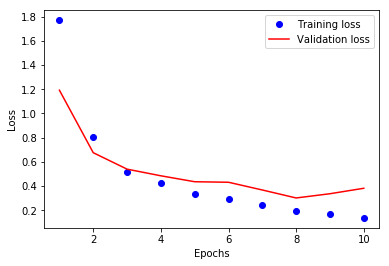

In [9]:
# 損失の可視化
plot_train_val_loss(history)

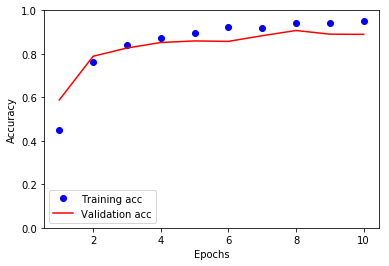

In [10]:
# 正答率の可視化
plot_train_val_acc(history)

In [11]:
# テストデータでの評価
history.model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 112us/step


[0.33212443579435347, 0.9022]